<a href="https://colab.research.google.com/github/Redcoder815/Deep_Learning_PyTorch/blob/main/05MultiLayerPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.utils import data
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def relu(X):
  a = torch.zeros_like(X)
  return torch.max(X, a)

In [3]:
class MultiLayerPerceptron(nn.Module):
  def __init__(self, num_inputs, num_outputs, num_hidden, sigma=0.01):
    super().__init__()
    self.num_inputs = num_inputs # Store num_inputs
    self.w1 = nn.Parameter(torch.randn(num_inputs, num_hidden) * sigma)
    self.b1 = nn.Parameter(torch.zeros(num_hidden))
    self.w2 = nn.Parameter(torch.randn(num_hidden, num_outputs) * sigma)
    self.b2 = nn.Parameter(torch.zeros(num_outputs))

  def forward(self, X):
    X = X.reshape((-1, self.num_inputs))
    H = relu(torch.matmul(X, self.w1) + self.b1)
    return torch.matmul(H, self.w2) + self.b2

In [4]:
batch_size = 256
lr = 0.1
max_epochs = 3

# Data loading
transformer = transforms.ToTensor()
mnist_train = datasets.FashionMNIST(root="../data", train=True, transform=transformer, download=True)
mnist_val = datasets.FashionMNIST(root="../data", train=False, transform=transformer, download=True)

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True, num_workers=4)
val_iter = data.DataLoader(mnist_val, batch_size, shuffle=False, num_workers=4)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [5]:
model = MultiLayerPerceptron(num_inputs=784, num_outputs=10, num_hidden=256)

In [6]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

In [7]:
train_loss = []
for epoch in range(max_epochs):
  model.train()
  train_loss_sum, train_accuracy_sum, n = 0.0, 0.0, 0
  for x, y in train_iter:
    y_pred = model(x)
    l = loss_fn(y_pred, y)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    train_loss_sum += l
    train_loss.append(l.item())
    predicted_labels = torch.argmax(y_pred, dim=1)
    train_accuracy_sum += (predicted_labels == y).float().sum()
    n += y.numel()

  model.eval()
  test_accuracy_sum, test_n = 0.0, 0
  with torch.no_grad():
    for x, y in val_iter:
      y_pred = model(x)
      predicted_labels = torch.argmax(y_pred, dim=1)
      test_accuracy_sum += (predicted_labels == y).float().sum()
      test_n += y.numel()
  test_accuracy = test_accuracy_sum / test_n
  print(f'Epoch {epoch + 1}, Loss: {train_loss_sum / n:.4f}, Train Accuracy: {train_accuracy_sum / n:.4f}, Validation Accuracy: {test_accuracy:.4f}')

Epoch 1, Loss: 0.0027, Train Accuracy: 0.7638, Validation Accuracy: 0.8237
Epoch 2, Loss: 0.0017, Train Accuracy: 0.8456, Validation Accuracy: 0.8404
Epoch 3, Loss: 0.0016, Train Accuracy: 0.8606, Validation Accuracy: 0.8552


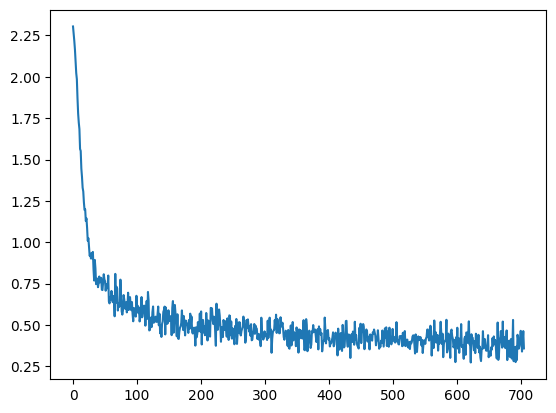

In [8]:
plt.plot(train_loss)
plt.show()

In [9]:
class MultiLayerPerceptron_Sequential(nn.Module):
  def __init__(self, num_inputs, num_outputs, num_hiddens):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Flatten(),
        nn.Linear(num_inputs, num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens, num_outputs)
    )

  def forward(self, x):
    # x = x.view(x.shape[0], -1) # alternative is nn.Flatten()
    return self.layers(x)

In [10]:
model_sequential = MultiLayerPerceptron_Sequential(num_inputs=784, num_outputs=10, num_hiddens=256)

In [11]:
optimizer = torch.optim.Adam(model_sequential.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

In [12]:
train_loss_sequential = []
for epoch in range(max_epochs):
  model.train()
  train_loss_sum, train_accuracy_sum, n = 0.0, 0.0, 0
  for x, y in train_iter:
    y_pred = model_sequential(x)
    l = loss_fn(y_pred, y)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    train_loss_sum += l
    train_loss_sequential.append(l.item())
    predicted_labels = torch.argmax(y_pred, dim=1)
    train_accuracy_sum += (predicted_labels == y).float().sum()
    n += y.numel()

  model.eval()
  test_accuracy_sum, test_n = 0.0, 0
  with torch.no_grad():
    for x, y in val_iter:
      y_pred = model_sequential(x)
      predicted_labels = torch.argmax(y_pred, dim=1)
      test_accuracy_sum += (predicted_labels == y).float().sum()
      test_n += y.numel()
  test_accuracy = test_accuracy_sum / test_n
  print(f'Epoch {epoch + 1}, Loss: {train_loss_sum / n:.4f}, Train Accuracy: {train_accuracy_sum / n:.4f}, Validation Accuracy: {test_accuracy:.4f}')

Epoch 1, Loss: 0.0024, Train Accuracy: 0.7931, Validation Accuracy: 0.8368
Epoch 2, Loss: 0.0017, Train Accuracy: 0.8513, Validation Accuracy: 0.8483
Epoch 3, Loss: 0.0015, Train Accuracy: 0.8626, Validation Accuracy: 0.8482


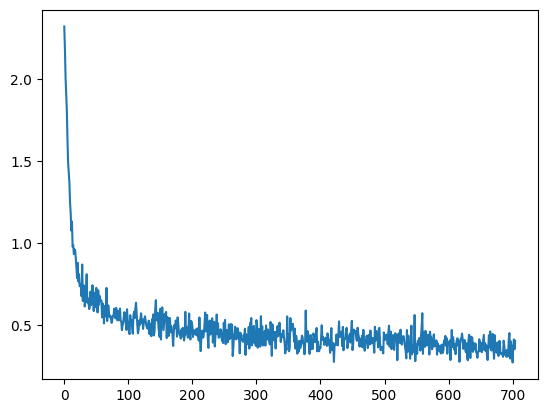

In [13]:
plt.plot(train_loss_sequential)
plt.show()